In [18]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from skimage.transform import resize
import numpy as np
import matplotlib.pyplot as plt
#1. Byg en model ud fra Cifar10's dataset https://keras.io/api/datasets/cifar10/
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#vis datasets indhold 
print(x_train.shape)
print(x_test.shape)


#reshape to 1 dimension array
y_train = y_train.reshape(-1)




#set classes 
classes = ["airplane","car","bird","cat","deer","dog","frog","horse","ship","truck"]



#function til at vise billedet 
def plot_sample(x, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])
    






#2. fin et billede af en frø, en bil, og et skib og bestem ud fra modelen billedets kategori
#3. Evaluer modellen og plot hvor præcis den er 





(50000, 32, 32, 3)
(10000, 32, 32, 3)


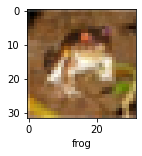

In [20]:
plot_sample(x_train, y_train, 0)

In [21]:
#normalize data
x_train = x_train / 255
x_test = x_test / 255

In [22]:
# build artificial neural network 
ann = models.Sequential([
          layers.Flatten(input_shape=(32,32,3)),
          layers.Dense(3000, activation='relu'),
          layers.Dense(1000, activation='relu'),
          layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)


Epoch 1/5
 557/1563 [=========>....................] - ETA: 25s - loss: 1.9317 - accuracy: 0.3059

KeyboardInterrupt: 

In [23]:
# build a convolutional neural network
from tensorflow.keras import datasets, layers, models
cnn = models.Sequential([
          # cnn 
          layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
          layers.MaxPooling2D((2,2)),
    
    
          #dense
          layers.Flatten(),
          layers.Dense(1000, activation='relu'),
          layers.Dense(10, activation='softmax')
])



In [24]:
cnn.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])


In [45]:
history = cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.0889 - accuracy: 0.9711
Epoch 2/10
1563/1563 [==============================] - 49s 32ms/step - loss: 0.0664 - accuracy: 0.9791
Epoch 3/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.0727 - accuracy: 0.9769
Epoch 4/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.0613 - accuracy: 0.9811
Epoch 5/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.0605 - accuracy: 0.9810
Epoch 6/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.0571 - accuracy: 0.9816
Epoch 7/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.0526 - accuracy: 0.9835
Epoch 8/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.0512 - accuracy: 0.9839
Epoch 9/10
1563/1563 [==============================] - 49s 32ms/step - loss: 0.0474 - accuracy: 0.9851
Epoch 10/10
1563/1563 [==============================] - 49s 31m

In [46]:
cnn.evaluate(x_test,y_test)



313/313 [==============================] - 3s 8ms/step - loss: 2.6711 - accuracy: 0.6472


[2.6711232662200928, 0.6471999883651733]

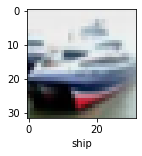

In [47]:
y_test = y_test.reshape(-1)
plot_sample(x_test, y_test, 1)

In [48]:
y_pred = cnn.predict(x_test)
y_pred[:5]

array([[9.5582764e-06, 5.9831829e-05, 6.3948215e-07, 9.5951623e-01,
        4.6753874e-03, 5.1277126e-03, 2.6638655e-03, 3.1896008e-07,
        2.7946424e-02, 8.7131994e-08],
       [1.5131609e-13, 5.7588648e-03, 1.4470741e-25, 3.7456768e-30,
        3.5191783e-24, 2.7498984e-34, 1.1100475e-33, 7.8685930e-34,
        9.9424112e-01, 8.5540732e-12],
       [2.1004356e-05, 9.3261343e-07, 4.0668562e-09, 2.6377905e-10,
        2.4902098e-09, 2.6834010e-10, 2.4640849e-14, 7.3678623e-09,
        9.9997795e-01, 1.0389385e-07],
       [6.2893075e-01, 2.7701477e-09, 2.4683175e-03, 4.6749387e-09,
        2.5900041e-08, 4.5688904e-17, 3.6283154e-11, 9.2057187e-12,
        3.6860096e-01, 1.3583457e-09],
       [8.3325435e-25, 1.4431205e-14, 1.0642804e-08, 8.9265866e-09,
        6.1424777e-07, 5.8359935e-16, 9.9999940e-01, 2.3728413e-25,
        4.9806025e-25, 1.6994565e-20]], dtype=float32)

In [49]:
y_classes = [np.argmax(element) for element in y_pred]

#test compare
y_classes[:5]




[3, 8, 8, 0, 6]

In [50]:
#test compare
y_test[:5]



array([3, 8, 8, 0, 6], dtype=uint8)

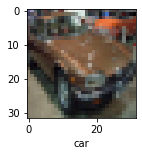

In [51]:
plot_sample(x_test, y_test,2000)



In [52]:
classes[y_classes[2000]]



'car'

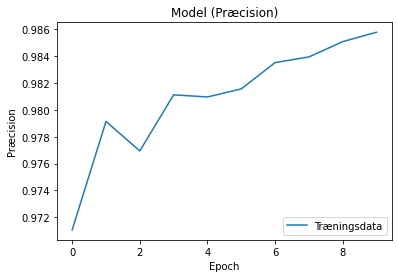

In [53]:
#3. Evaluer modellen og plot hvor præcis den er 
plt.plot(history.history['accuracy'])
plt.title('Model (Præcision)')
plt.ylabel('Præcision')
plt.xlabel('Epoch')
plt.legend(['Træningsdata'], loc='lower right')
plt.show()